# K近邻算法从零实现

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 1. K近邻二分类

### 样例数据(鸢尾花数据集)

**鸢尾花数据集（Iris Dataset）**<br>
&emsp;是一个经典的机器学习数据集，经常用于分类算法的示例和测试。它由英国统计学家和生物学家Ronald A. Fisher在1936年收集和使用。数据集包含150个数据点，每个数据点有4个特征和3种分类标签。具体解释如下：

**特征**<br>
&emsp;每个数据点代表一朵鸢尾花，有以下4个特征：<br>
<br>
&emsp;花萼长度 (Sepal Length): 花的萼片的长度，单位为厘米。<br>
&emsp;花萼宽度 (Sepal Width): 花的萼片的宽度，单位为厘米。<br>
&emsp;花瓣长度 (Petal Length): 花的花瓣的长度，单位为厘米。<br>
&emsp;花瓣宽度 (Petal Width): 花的花瓣的宽度，单位为厘米。<br>
**分类标签**<br>
&emsp;鸢尾花数据集包含3个不同种类的鸢尾花：<br>
<br>
&emsp;Setosa: 山鸢尾。<br>
&emsp;Versicolor: 变色鸢尾。<br>
&emsp;Virginica: 维吉尼亚鸢尾。<br>
&emsp;每种分类包含50个数据点，所以整个数据集包含150个数据点。<br>

In [16]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> 考虑只将花瓣的长度和宽度作为输入特征

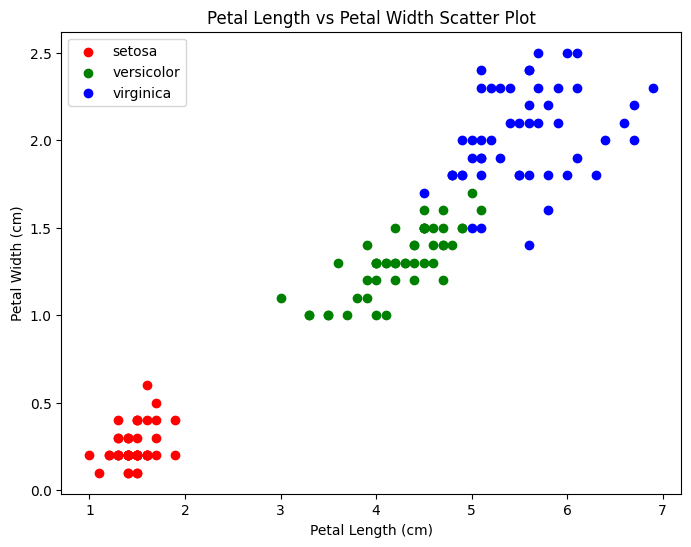

In [21]:
colors = {0: 'red', 1: 'green', 2: 'blue'}

# 绘制散点图
plt.figure(figsize=(8, 6))
for idx in df['target'].unique():
    subset = df[df['target'] == idx]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                label=f'{iris.target_names[idx]}', color=colors[idx])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width Scatter Plot')
plt.legend()
plt.show()

In [29]:
# 输入数据和标签数据
x, y = df[['petal length (cm)', 'petal width (cm)']].values, df['target'].values.reshape(-1, 1)
x.shape, y.shape

((150, 2), (150, 1))

### 距离度量

In [43]:
def Lp(x: np.ndarray, point: np.ndarray, p: int = 2) -> np.ndarray:
    """
    Lp范数
    :params x: 训练数据， shape = (N, feature_nums)
    :params point: 目标点, shape = (n, feature)
    :return:
        P = 1: 曼哈顿距离
        P = 2: 欧式距离
    """ 
    return ((x - point)**p).sum(axis=1).reshape(x.shape[0], 1)

In [78]:
L1 = pd.DataFrame(data=Lp(x, np.array([5.0, 1.5])), columns=['Lp'])
L1.head()

,Lp
0,14.65
1,14.65
2,15.38
3,13.94
4,14.65


### K值选取

In [79]:
k = 5

In [80]:
indexs = L1.sort_values(by='Lp')[:k].index

### 决策方案

In [81]:
y[indexs]

array([[2],
       [1],
       [1],
       [2],
       [1]])

In [82]:
# 投票选取
y_dict = {}
for yi in y[indexs].flatten():
    if yi in y_dict.keys():
        y_dict[yi] += 1
    else:
        y_dict[yi] = 1
y_dict

{2: 2, 1: 3}

### 合并实现

In [ ]:
class ClassificationKNN:

    def __init__(self, ) -> None:
        pass